In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
# Load the data
df = pd.read_csv('data.csv')

In [3]:
df.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
# See descriptive summary
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# There are some age values which are less than 0, so need to clean that
df.loc[df['Age'] < 0, 'Age'] = 0

### Perform EDA on the data

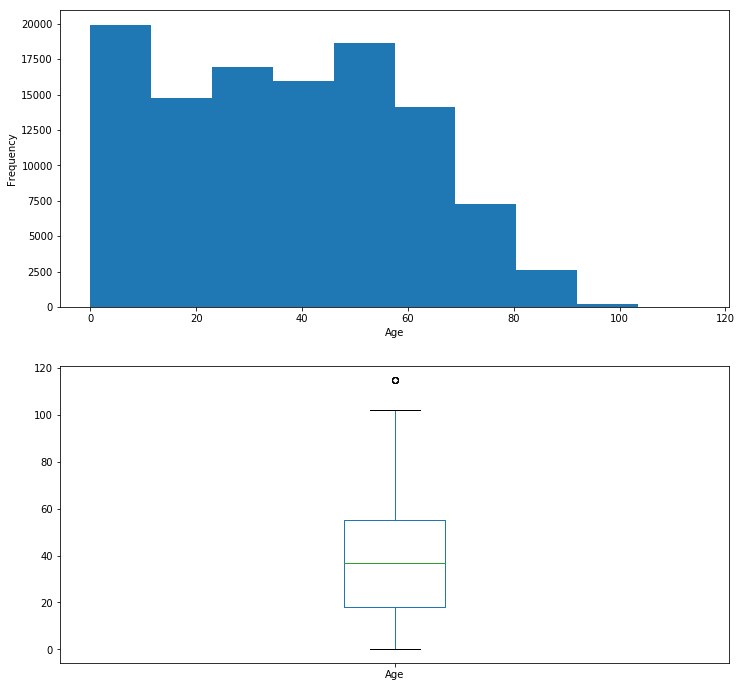

In [6]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,1,1)
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
df['Age'].hist(grid=False, ax=ax1)

ax2 = fig.add_subplot(2,1,2)
df['Age'].plot(kind='box', ax=ax2)

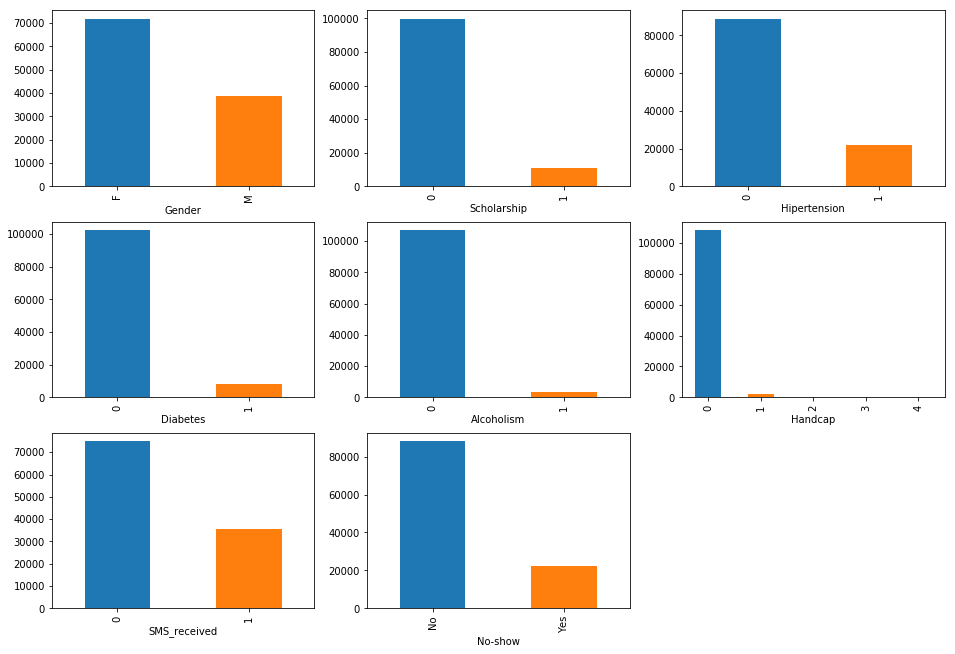

In [7]:
# Visualize the distribution of the categorical variables

categorical_variables = [
    'Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'
]

fig = plt.figure(figsize=(16, 11))
for ctr, variable in enumerate(categorical_variables):
    ax = fig.add_subplot(3, 3, ctr+1)
    ax.set_xlabel(variable)
    df[variable].value_counts().plot(kind='bar', ax=ax)

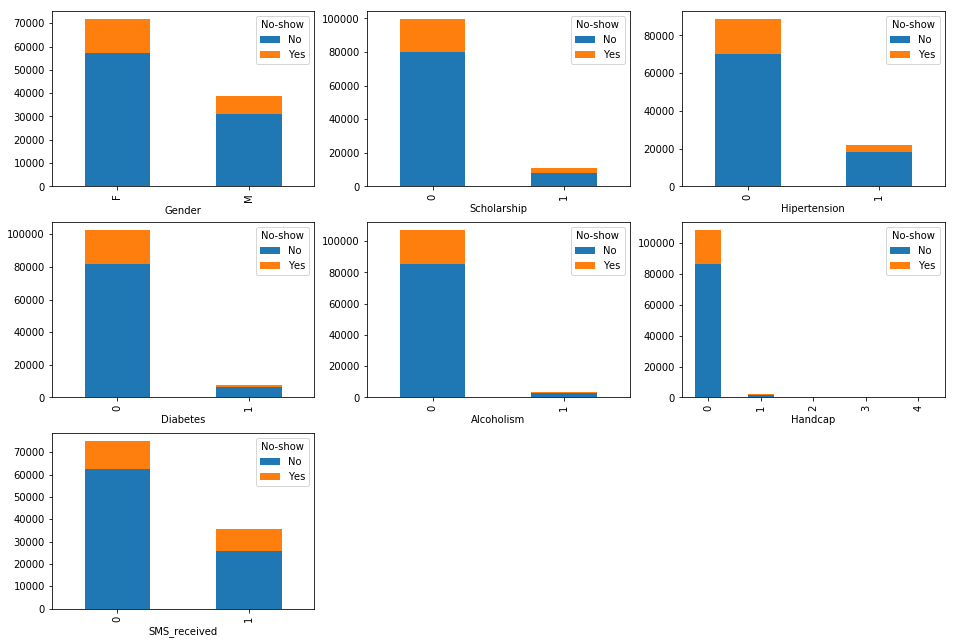

In [8]:
# Visualize the categorical variables grouped by No-Show

categorical_variables = [
    'Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received'
]

fig = plt.figure(figsize=(16, 11))
for ctr, variable in enumerate(categorical_variables):
    ax = fig.add_subplot(3, 3, ctr+1)
    df.groupby([variable, 'No-show'])[variable].count().unstack('No-show').plot(ax=ax, kind='bar', stacked=True)

On observing the above graphs, we don't see a clear pattern as such in any of the predictor variables

In [9]:
# Convert the ScheduledDay and AppointmentDay columns to type 'datetime' instead of string

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

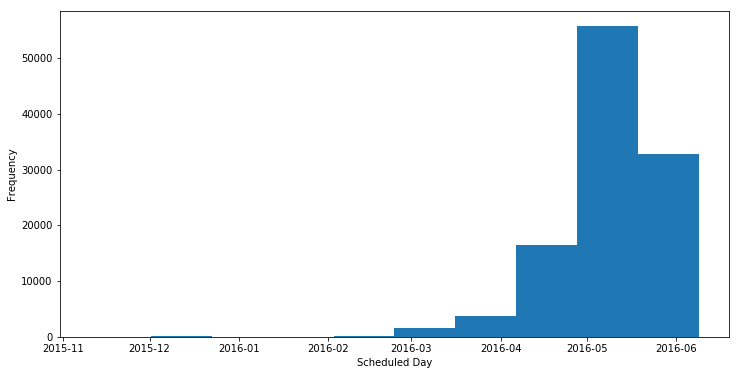

In [10]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Scheduled Day')
ax.set_ylabel('Frequency')
df['ScheduledDay'].hist(grid=False, ax=ax)

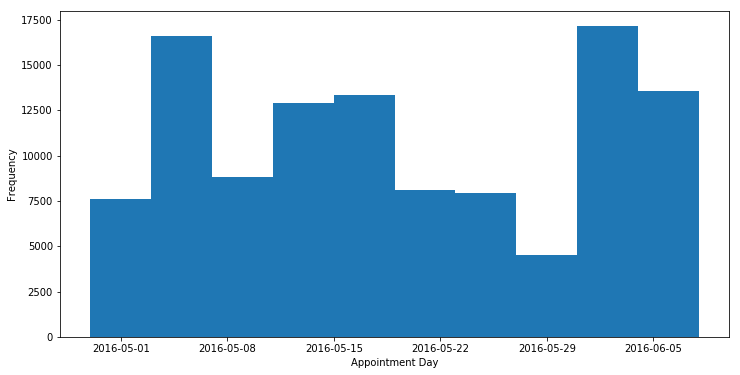

In [11]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Appointment Day')
ax.set_ylabel('Frequency')
df['AppointmentDay'].hist(grid=False, ax=ax)

In [12]:
print(df['ScheduledDay'].min())
print(df['ScheduledDay'].max())

2015-11-10 07:13:56
2016-06-08 20:07:23


In [13]:
print(df['AppointmentDay'].min())
print(df['AppointmentDay'].max())

2016-04-29 00:00:00
2016-06-08 00:00:00


We see that appointment dates range from 29th April 2016 - 8th June 2016 (around 1.5 months), but some appoinments were scheduled well in prior

### Predicting No-Show

#### Create new features

Since we see that some appointments were made well in prior, this could be an important feature since appointments which were scheduled well in prior have a higher chance of no-show

In [14]:
df['difference_between_scheduled_and_appointment'] = df['AppointmentDay'] - pd.to_datetime(df['ScheduledDay'].dt.date)
df['difference_between_scheduled_and_appointment'] = (
    df['difference_between_scheduled_and_appointment'].apply(lambda x: int(str(x).split('days')[0].strip()))
)

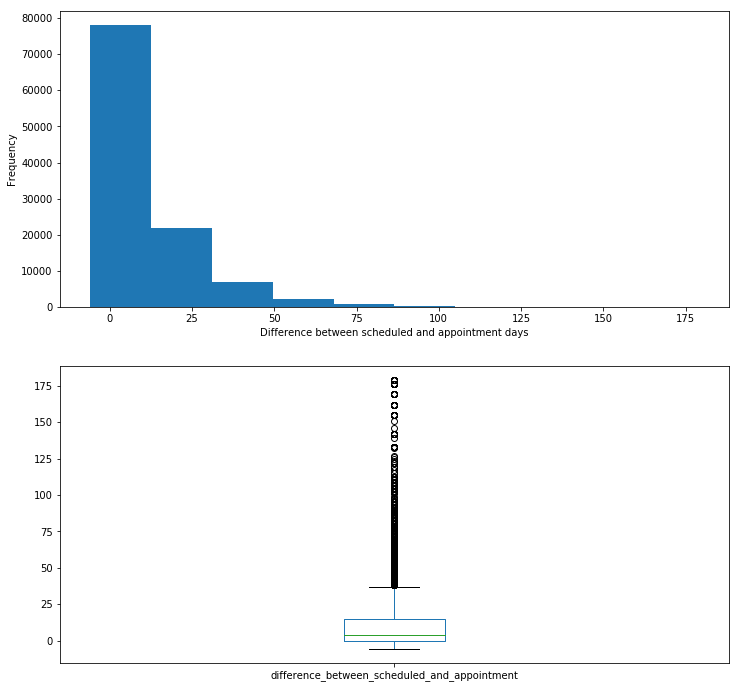

In [15]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,1,1)
ax1.set_xlabel('Difference between scheduled and appointment days')
ax1.set_ylabel('Frequency')
df['difference_between_scheduled_and_appointment'].hist(grid=False, ax=ax1)

ax2 = fig.add_subplot(2,1,2)
df['difference_between_scheduled_and_appointment'].plot(kind='box', ax=ax2)

In [16]:
# Create separate features for scheduled hour and date, appointment date

df['scheduled_hour'] = df['ScheduledDay'].apply(lambda x: x.hour)
df['scheduled_date'] = df['ScheduledDay'].apply(lambda x: x.day)
df['appointment_date'] = df['AppointmentDay'].apply(lambda x: x.day)

#### Create models

In [17]:
# Convert text columns to numeric

df['Gender'].replace({'F': 0, 'M': 1}, inplace=True)
df['No-show'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [18]:
# Create dummy variables for Handcap variable

handicap_df = pd.get_dummies(df['Handcap'], prefix='handicap')
df = pd.concat([df, handicap_df], axis=1)
df.drop(['Handcap', 'handicap_4'], axis=1, inplace=True)

In [19]:
# Define features and target variable for the model
features = [
    'Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received',
    'difference_between_scheduled_and_appointment', 'scheduled_hour', 'scheduled_date',
    'appointment_date', 'handicap_0', 'handicap_1', 'handicap_2', 'handicap_3'
]
target_variable = 'No-show'

In [20]:
# Scale the data using min max scaling

scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df[features]))
scaled_df.columns = features
scaled_df['No-show'] = df['No-show']

In [21]:
# Create testing and training data
X_train, X_test, y_train, y_test = train_test_split(scaled_df[features], scaled_df[target_variable], test_size=0.2)

In [22]:
# Try different models

results = {}
models = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('lr', LogisticRegression()),
    ('lda', LinearDiscriminantAnalysis())
]

for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = (model, accuracy)

In [23]:
sorted_results = sorted(results.items(), key=lambda x: x[1][1], reverse=True)
for model_name, (model, accuracy) in sorted_results:
    print(model_name, accuracy)

lr 0.7937211616755632
lda 0.7887903736542116
rf 0.7749027413371935


In [24]:
# Check the important features of random forest
print(sorted(zip(results['rf'][0].feature_importances_, features), reverse=True))

[(0.32958934132907863, 'Age'), (0.199518094425679, 'difference_between_scheduled_and_appointment'), (0.1542833407116725, 'scheduled_hour'), (0.12403252117766715, 'scheduled_date'), (0.1150741064719407, 'appointment_date'), (0.023551127083963355, 'Gender'), (0.0139978031016861, 'SMS_received'), (0.010703453044883252, 'Scholarship'), (0.009716131836302136, 'Hipertension'), (0.008099170929075644, 'Diabetes'), (0.006231551774740837, 'Alcoholism'), (0.002358486625006832, 'handicap_0'), (0.002192410094777241, 'handicap_1'), (0.0005725329330792284, 'handicap_2'), (7.992846044726878e-05, 'handicap_3')]


In [25]:
# Check the important features of logistic regression
print(sorted(zip(abs(results['lr'][0].coef_[0]), features), reverse=True))

[(4.308097387143466, 'difference_between_scheduled_and_appointment'), (0.9307446633439889, 'Age'), (0.5822335602979587, 'scheduled_hour'), (0.4240564630707105, 'handicap_0'), (0.35937076962651987, 'handicap_1'), (0.3127234003625271, 'scheduled_date'), (0.30795260174412686, 'SMS_received'), (0.30008912970692364, 'handicap_2'), (0.24775991809160966, 'Scholarship'), (0.22692570020367328, 'Alcoholism'), (0.22078113657562576, 'handicap_3'), (0.14400754766929258, 'Diabetes'), (0.1191766618342423, 'appointment_date'), (0.03682029578074785, 'Hipertension'), (0.010691796103593058, 'Gender')]


### Highest accuracy is being given by Logistic Regression which is 0.7937
Test this using cross validation also

In [26]:
model = LogisticRegression()
cross_val_scores = cross_val_score(model, scaled_df[features], scaled_df[target_variable], cv=5)
print(cross_val_scores.mean())

0.7939961336563494
